In [1]:
import pandas as pd
import os
import requests
from io import StringIO

IMAGES_PATH = os.path.join(".","images")

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

def read_file(csv_path):
    return pd.read_csv(csv_path, sep=";", decimal=",")


## Generating fictional data

In [2]:
import numpy.random as rand
rand.seed(42)

names = ['John','Martha','Will','Alice','Bob', 'Mike']

def generate_data(num_points,missed): 
    
    #Dates
    months=['april','may','june','july','sept','oct']
    dates = []

    #Names

    hunters=[]

    #Points
    points=[round(num, 0) for num in rand.normal(5, 1, num_points)] 

    #Approach
    approach = ['Bad', 'Medium', 'High']
    app = []

    #Longitude
    long = rand.uniform(-123.74, -123.62,num_points)

    #Latitude
    lat = rand.uniform(46.993305, 47.037326,num_points)

    #Season
    season = []

    for i in range(num_points):
        year = rand.randint(2013, 2020)
        dates.append(months[rand.randint(0, 6)] + ' '+ str(year))
        hunters.append(names[rand.randint(0, 6)])
        app.append(approach[rand.randint(0, 3)])
        season.append(str(year) + '/' + str(year+1) )

    data = {'Date':  dates,
            'Hunter': hunters,
            'Points': points,
            'Approach':app,
            'Longitude':long,
            'Latitude':lat,
            'Season':season
            }
    if missed:
        del data['Date']
        del data['Approach']
        del data['Points']
        
    return pd.DataFrame.from_dict(data)

In [3]:
hunted = generate_data(40,missed=False)
hunted.head()

,Date,Hunter,Points,Approach,Longitude,Latitude,Season
0,oct 2013,Bob,5.0,Bad,-123.623650,46.998570,2013/2014
1,may 2015,Alice,5.0,High,-123.646984,47.024703,2015/2016
2,oct 2015,John,6.0,Bad,-123.627260,47.026796,2015/2016
3,april 2018,Martha,7.0,Medium,-123.632621,47.018013,2018/2019
4,may 2019,Will,5.0,Bad,-123.668252,47.027244,2019/2020


In [4]:
missed = generate_data(15, missed=True)
missed.head()

,Hunter,Longitude,Latitude,Season
0,Will,-123.709500,46.996428,2019/2020
1,Alice,-123.704565,47.010772,2013/2014
2,Mike,-123.701294,46.995540,2019/2020
3,Will,-123.638160,47.032335,2016/2017
4,Martha,-123.723605,46.994521,2016/2017


In [5]:
missed.to_csv('missed.csv', index=False, sep=';',decimal=",")
hunted.to_csv('hunted.csv', index=False,sep=';',decimal=",")

In [6]:
killed_test= read_file('missed.csv')
killed_test

,Hunter,Longitude,Latitude,Season
0,Will,-123.709500,46.996428,2019/2020
1,Alice,-123.704565,47.010772,2013/2014
2,Mike,-123.701294,46.995540,2019/2020
3,Will,-123.638160,47.032335,2016/2017
4,Martha,-123.723605,46.994521,2016/2017
5,John,-123.654931,47.018787,2018/2019
6,Martha,-123.673662,47.012607,2015/2016
7,Martha,-123.704419,47.022888,2014/2015
8,Alice,-123.689626,47.007751,2018/2019
9,Martha,-123.709255,47.000130,2013/2014


In [19]:
import numpy as np
print(hunted["Hunter"].unique())
a= np.asarray(hunted["Hunter"].unique())
print(type(a))

array_sum = np.sum(a)
array_has_nan = np.isnan(array_sum)

['Bob' 'Alice' 'John' 'Martha' 'Will' 'Mike']
<class 'numpy.ndarray'>


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

## Plotting data

In [8]:
def transform_lance():
    ApprNum = []
    for index, appr in enumerate(hunted['Approach']):
        if appr== 'High':
            ApprNum.append(3) 
            
        elif appr== 'Medium':
            ApprNum.append(2) 

        else:
            ApprNum.append(1) 
        
    hunted['ApprNum'] = ApprNum
    return hunted

In [9]:
transform_lance()

,Date,Hunter,Points,Approach,Longitude,Latitude,Season,ApprNum
0,oct 2013,Bob,5.0,Bad,-123.623650,46.944892,2013/2014,1
1,may 2015,Alice,5.0,High,-123.646984,46.985087,2015/2016,3
2,oct 2015,John,6.0,Bad,-123.627260,46.988305,2015/2016,1
3,april 2018,Martha,7.0,Medium,-123.632621,46.974797,2018/2019,2
4,may 2019,Will,5.0,Bad,-123.668252,46.988995,2019/2020,1
5,april 2017,John,5.0,High,-123.629375,46.970228,2017/2018,3
6,may 2013,Martha,7.0,Medium,-123.729381,46.972188,2013/2014,2
7,sept 2019,John,6.0,Bad,-123.716482,46.965743,2019/2020,1
8,oct 2015,Martha,5.0,Bad,-123.734573,46.938516,2015/2016,1
9,may 2016,Mike,6.0,High,-123.700960,46.944100,2016/2017,3


In [12]:
trues = ["hunted"]*len(hunted)
sizes= hunted["Points"].tolist()
sizes = [2*x for x in sizes]
hunted["Type"] = trues
hunted["Size"] = sizes

falses = ["missed"]*len(missed)
sizes= [12]*len(missed)
missed["Type"] = falses
missed["Size"] = sizes

result = hunted.append(missed, sort=False)
result

,Date,Hunter,Points,Approach,Longitude,Latitude,Season,ApprNum,Type,Size
0,oct 2013,Bob,5.0,Bad,-123.623650,46.944892,2013/2014,1.0,hunted,10.0
1,may 2015,Alice,5.0,High,-123.646984,46.985087,2015/2016,3.0,hunted,10.0
2,oct 2015,John,6.0,Bad,-123.627260,46.988305,2015/2016,1.0,hunted,12.0
3,april 2018,Martha,7.0,Medium,-123.632621,46.974797,2018/2019,2.0,hunted,14.0
4,may 2019,Will,5.0,Bad,-123.668252,46.988995,2019/2020,1.0,hunted,10.0
5,april 2017,John,5.0,High,-123.629375,46.970228,2017/2018,3.0,hunted,10.0
6,may 2013,Martha,7.0,Medium,-123.729381,46.972188,2013/2014,2.0,hunted,14.0
7,sept 2019,John,6.0,Bad,-123.716482,46.965743,2019/2020,1.0,hunted,12.0
8,oct 2015,Martha,5.0,Bad,-123.734573,46.938516,2015/2016,1.0,hunted,10.0
9,may 2016,Mike,6.0,High,-123.700960,46.944100,2016/2017,3.0,hunted,12.0


### Hunted vs Missed

In [9]:
hunted_cut = hunted.drop(labels=['Date', 'Approach','Points','ApprNum'], axis=1)
hunted_cut.head()

,Hunter,Longitude,Latitude,Season
0,Bob,-123.623650,46.944892,2013/2014
1,Alice,-123.646984,46.985087,2015/2016
2,John,-123.627260,46.988305,2015/2016
3,Martha,-123.632621,46.974797,2018/2019
4,Will,-123.668252,46.988995,2019/2020


In [10]:
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

filename = "mapa-nosat.png"
navas_img=mpimg.imread(os.path.join(".", filename))

#var1 es un string
def plot_killedVsMissed (pandaKilled, pandaMissed, var1,title):
    colors = ['red','blue','green','orange','purple', 'brown', 'black' ]
    categories_var1 = pandaKilled['{}'.format(var1)].unique()
    categories_missed = pandaMissed['{}'.format(var1)].unique()
    for element in categories_missed:
        if element not in categories_var1:
            categories_var1 = np.append(categories_var1,element)
    
    custom_lines = []
    for i in range(len(categories_var1)):
        custom_lines.append(Line2D([0], [0], marker='.', color=colors[i], lw=2))
   
    custom_lines.append(Line2D([0], [0],ls='None', marker='.', color='black', lw=2))
    custom_lines.append(Line2D([0], [0],ls='None', marker='x', color='black', lw=2))   
    
    colors_var1={}
    for index, element in enumerate(categories_var1):
        colors_var1[element] = colors[index]
    
    
    ax=pandaKilled.plot(kind="scatter", marker=".", x="Longitude", y="Latitude", alpha=0.8,
    figsize=(10,7),c=pandaKilled[var1].apply(lambda x: colors_var1[x]),
    sharex=False, s=70)
    
    pandaMissed.plot(ax=ax, kind="scatter", marker="x", x="Longitude", y="Latitude", alpha=0.8,
     figsize=(10,7),c=pandaMissed[var1].apply(lambda x: colors_var1[x]),
    sharex=False, s=50)
    
    plt.imshow(navas_img, alpha=1,extent=[-123.748038, -123.639780, 46.936795, 47.004502])
    plt.ylabel("Latitude", fontsize=14)
    plt.xlabel("Longitude", fontsize=14)
    ax.legend(custom_lines, categories_var1.tolist() + [ 'Hunted', 'Missed'])
    plt.title(title, fontsize=18)
    save_fig(title)
    


Saving figure Hunted vs Missed-Season


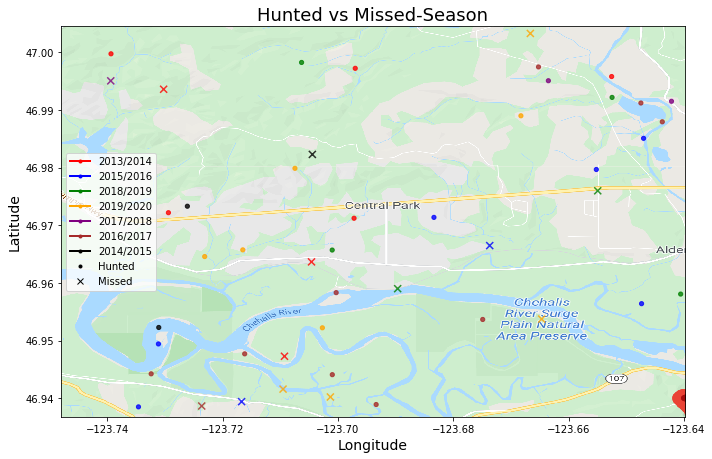

In [11]:
plot_killedVsMissed(hunted_cut,missed,'Season', 'Hunted vs Missed-Season')

Let's see who hunted more deers

In [14]:
hunted_season = hunted.groupby(by='Season')['Points'].count().sort_values(ascending=False)

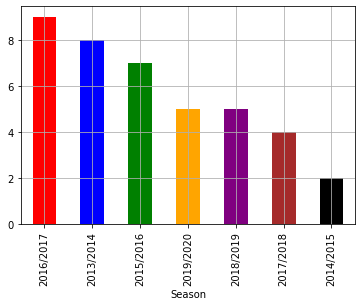

In [15]:
hunted_season.plot.bar(color=['red','blue','green','orange','purple', 'brown', 'black' ])
plt.grid(True)

In [16]:
#Other way to do it
hunted_season_test = hunted.groupby(by='Season')['Points'].count().sort_values(ascending=False).to_frame(name = 'count').reset_index()
hunted_season_test

,Season,count
0,2016/2017,9
1,2013/2014,8
2,2015/2016,7
3,2019/2020,5
4,2018/2019,5
5,2017/2018,4
6,2014/2015,2


Saving figure Hunted vs Missed-Hunter


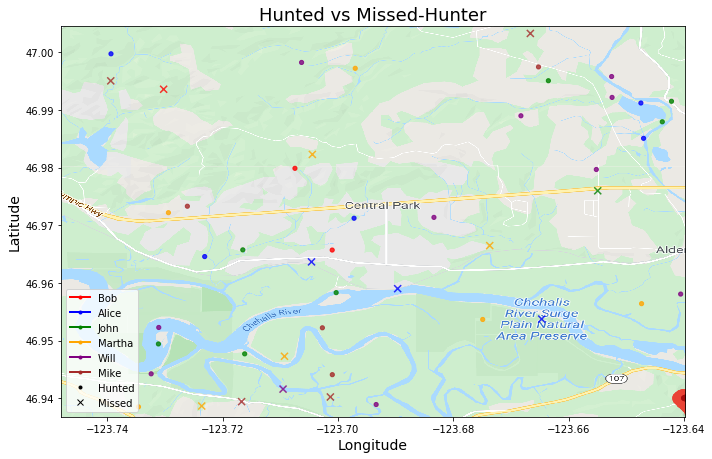

In [17]:
plot_killedVsMissed(hunted_cut,missed,'Hunter', 'Hunted vs Missed-Hunter')

In [15]:
hunted_hunter = hunted.groupby(by='Hunter')['Points'].count().sort_values(ascending=False)
hunted_hunter

Hunter
Will      10
John       9
Alice      7
Martha     6
Mike       5
Bob        3
Name: Points, dtype: int64

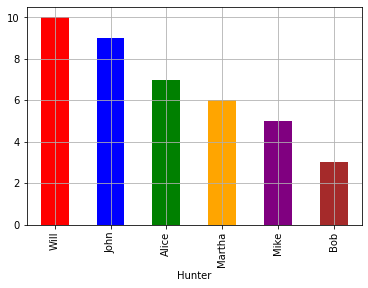

In [16]:
hunted_hunter.plot.bar(color=['red','blue','green','orange','purple', 'brown', 'black' ])
plt.grid(True)

### More plots

In [17]:
import matplotlib.image as mpimg
import numpy as np

filename = "mapa-nosat.png"
navas_img=mpimg.imread(os.path.join(".", filename))

def plot_relieve (pandaKilled, varColor,varSize, title):
    colors = ['red','blue','green','orange','purple', 'brown', 'black' ]
    categories_varColor = pandaKilled['{}'.format(varColor)].unique()

    colors_varColor={}
    for index, element in enumerate(categories_varColor):
        colors_varColor[element] = colors[index]
    
    custom_lines = []
    for i in range(len(categories_varColor)):
        custom_lines.append(Line2D([0], [0], marker='.', color=colors[i], lw=2))
        
    custom_lines.append(Line2D([0], [0], ls='None', marker='o', color='black', lw=2))
    
    
    ax=pandaKilled.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.7,
    s= 2+np.exp(0.6*pandaKilled[varSize]),label=colors_varColor, figsize=(10,7),c=pandaKilled[varColor].apply(lambda x: colors_varColor[x]),
    sharex=False)
    
    plt.imshow(navas_img, alpha=1,extent=[-123.748038, -123.639780, 46.936795, 47.004502])
    plt.ylabel("Latitude", fontsize=14)
    plt.xlabel("Longitude", fontsize=14)
    
    legend_list=[]
    if varColor=='ApprNum': 
        for element in categories_varColor:
            if element==1:
                legend_list.append('Low')
            elif element==2:
                legend_list.append('Medium')
            else:
                legend_list.append('High')
        
    else: 
        legend_list = categories_varColor.tolist()
    
    ax.legend(custom_lines,legend_list+['Point Size  = \n Roe Deers {} '.format(varSize)])
    plt.title(title, fontsize=18)
    save_fig(title)
    


Saving figure Season and Points


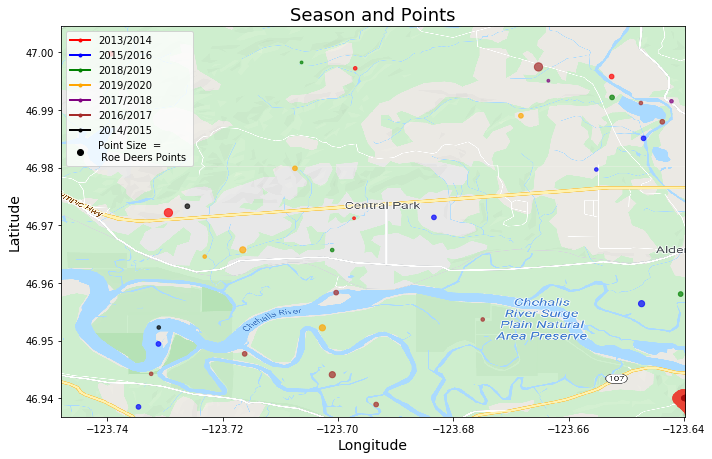

In [18]:
plot_relieve(hunted,'Season','Points','Season and Points')